In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np

In [26]:
#processing data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [27]:
#cnn model
model = models.Sequential()

# Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [28]:
#compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/5
938/938 [==============================] - 72s 72ms/step - loss: 0.1902 - accuracy: 0.9397 - val_loss: 0.0519 - val_accuracy: 0.9836
Epoch 2/5
938/938 [==============================] - 61s 65ms/step - loss: 0.0516 - accuracy: 0.9838 - val_loss: 0.0382 - val_accuracy: 0.9872
Epoch 3/5
938/938 [==============================] - 67s 71ms/step - loss: 0.0373 - accuracy: 0.9883 - val_loss: 0.0353 - val_accuracy: 0.9894
Epoch 4/5
938/938 [==============================] - 63s 68ms/step - loss: 0.0296 - accuracy: 0.9906 - val_loss: 0.0311 - val_accuracy: 0.9907
Epoch 5/5
938/938 [==============================] - 67s 71ms/step - loss: 0.0235 - accuracy: 0.9928 - val_loss: 0.0319 - val_accuracy: 0.9903


In [30]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 6s 20ms/step - loss: 0.0319 - accuracy: 0.9903
Test accuracy: 0.9902999997138977


In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
#random sapmle for 15
num_samples = 15
random_ind = np.random.choice(test_images.shape[0], num_samples, replace=False)

In [33]:
#extract them
random_test_images = test_images[random_ind]

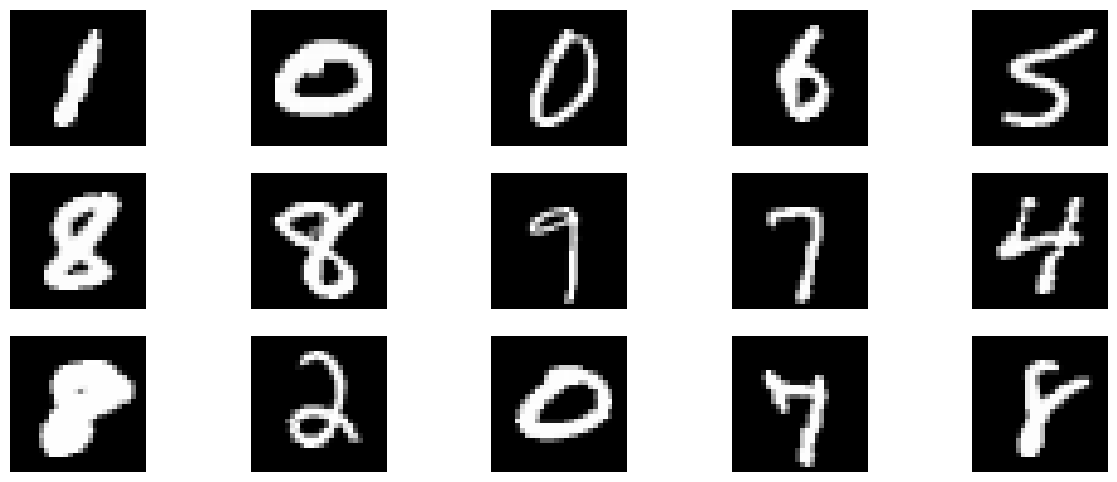

In [34]:
#display 
plt.figure(figsize=(15, 6))
for i in range(num_samples):
    plt.subplot(3, 5, i + 1)
    plt.imshow(random_test_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

In [35]:
#make prediction
predictions = model.predict(random_test_images)

1/1 [==============================] - 0s 272ms/step


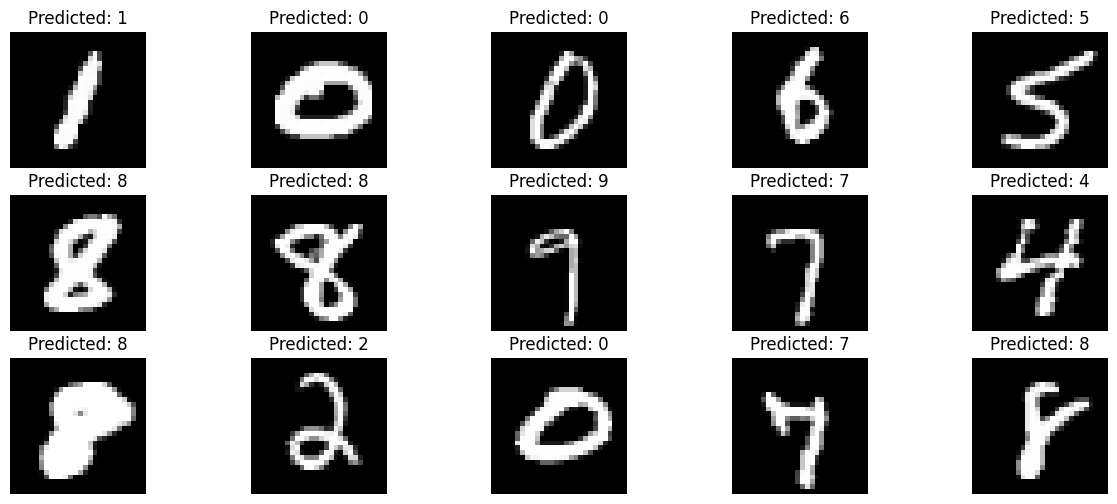

In [36]:
plt.figure(figsize=(15, 6))
for i in range(num_samples):
    plt.subplot(3, 5, i + 1)
    plt.imshow(random_test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()